In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date

engine = create_engine("sqlite:///youtube.db")
data = pd.read_sql('SELECT * FROM US;', engine)

In [37]:
# Converting TZ-date format into datetime

df = data
df['trending_date']= pd.to_datetime(df['trending_date'])
df2 = df.loc[df['trending_date'] == '2020-08-12']
df2.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg


In [3]:
datecount = df.groupby(['categoryId'])[['view_count']].sum()
datecount.head(5)

,view_count
categoryId,
1,4083274157
2,1091308489
10,47581396911
15,370296727
17,11392284450


In [4]:
datecount= datecount.reset_index(col_level=1)
datecount.head(5)

,categoryId,view_count
0,1,4083274157
1,2,1091308489
2,10,47581396911
3,15,370296727
4,17,11392284450


In [34]:
data2 = pd.read_sql('SELECT * FROM categories;', engine)
cat_df = data2
cat_df.head(5)

,category_name,categoryId
0,Entertainment,24
1,Music,10
2,Howto & Style,26
3,Sports,17
4,Comedy,23


In [20]:
total_trending = pd.merge(datecount, cat_df, on=['categoryId'])
total_trending.head(20)

,categoryId,view_count,category_name
0,1,4083274157,Film and Animation
1,2,1091308489,Autos & Vehicles
2,10,47581396911,Music
3,15,370296727,Pets & Animals
4,17,11392284450,Sports
5,19,103711482,Travel & Events
6,20,18077195011,Gaming
7,22,9803444628,People & Blogs
8,23,3889677508,Comedy
9,24,27426011579,Entertainment


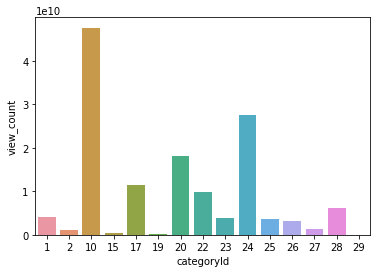

In [14]:
#Total view count per category for Trending Videos
barplot = sns.barplot(data=total_trending, x='categoryId', y='view_count')

# EDA Part 2

In [35]:
cat_count = pd.read_sql('SELECT categoryID, COUNT(categoryId) as video_count FROM US GROUP BY categoryId;', engine)
cat_count = pd.merge(cat_count, cat_df, on =['categoryId'])
cat_count.head(20)

,categoryId,video_count,category_name
0,1,1967,Film and Animation
1,2,931,Autos & Vehicles
2,10,10455,Music
3,15,310,Pets & Animals
4,17,5788,Sports
5,19,189,Travel & Events
6,20,6476,Gaming
7,22,4316,People & Blogs
8,23,2903,Comedy
9,24,10244,Entertainment


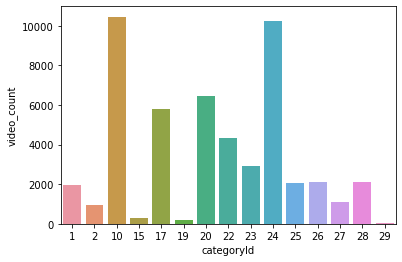

In [19]:
barplot2 = sns.barplot(data=cat_count, x='categoryId', y='video_count')

In [ ]:
sidebar
# select Category and display channels with most trending videos

SELECT categoryID, channelTitle, COUNT(channelTitle) as video_count FROM US
WHERE categoryId = '10'
GROUP BY channelTitle
ORDER BY video_count DESC
LIMIT 10

In [ ]:
#france
#for Date show top trending categories graph

#Top trending video categories this week
#max date - 7 days